This document contains histogram plots of important predictor and response variables

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [3]:
data = pd.read_csv('full_dataset.csv') 
print(data.shape)

(92488, 155)


In [5]:
target_variable = 'Ymean_times_One_plus_Ymean_minus_CV_over_Ymean_plus_CV_over_2'

terrain_attributes = ['NDVI_avg',
 'Soil_om_15-30cm',
 'SWI10',
 'PosOpen_LP30',
 'TPI_LP30',
 'Aspect_LP30']

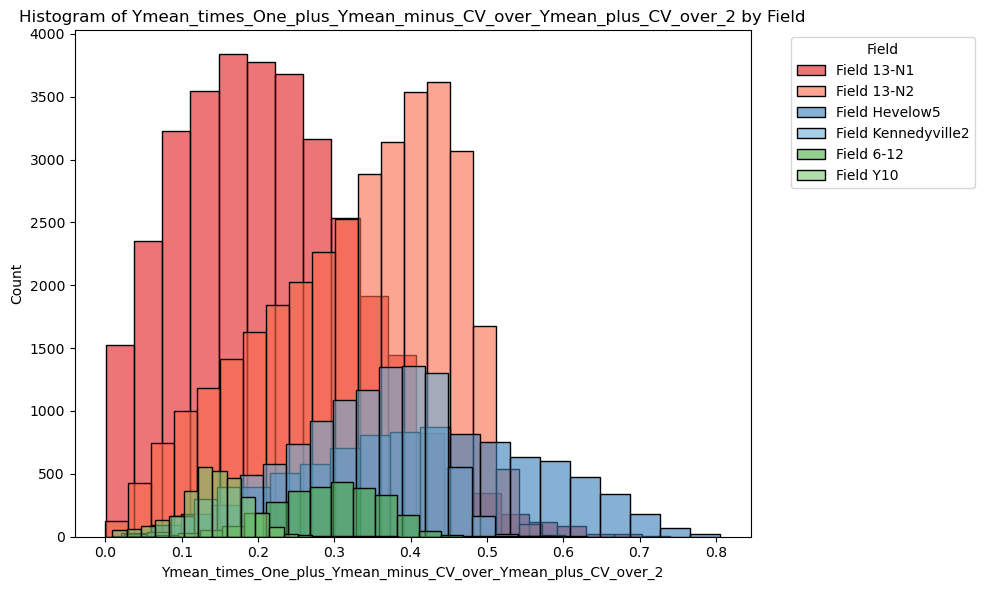

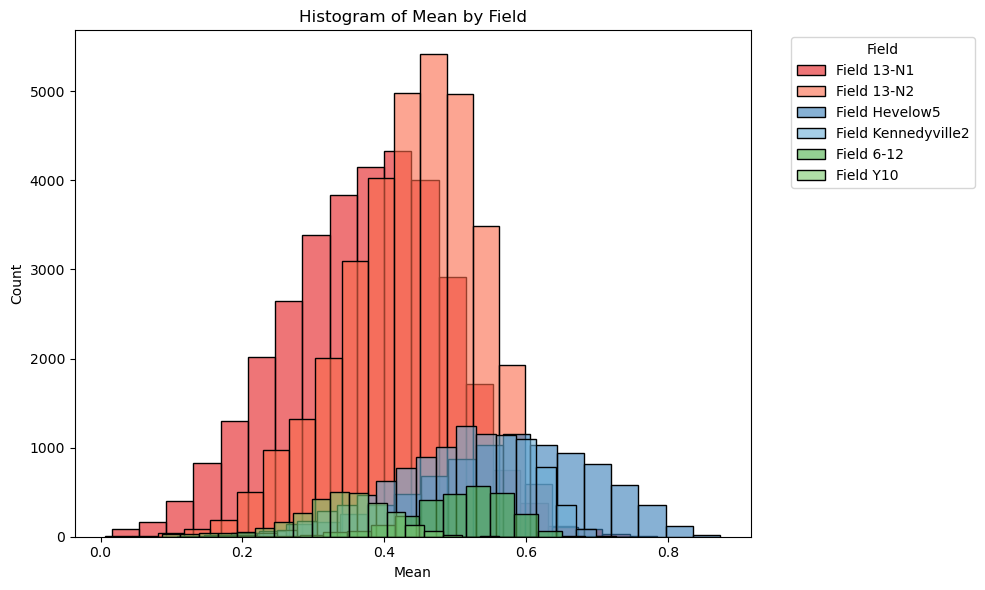

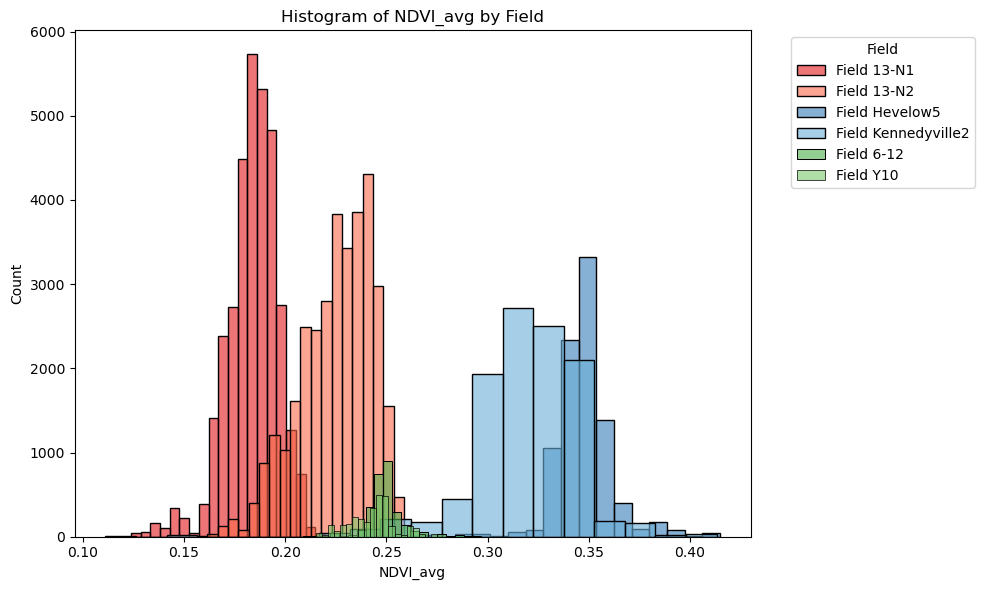

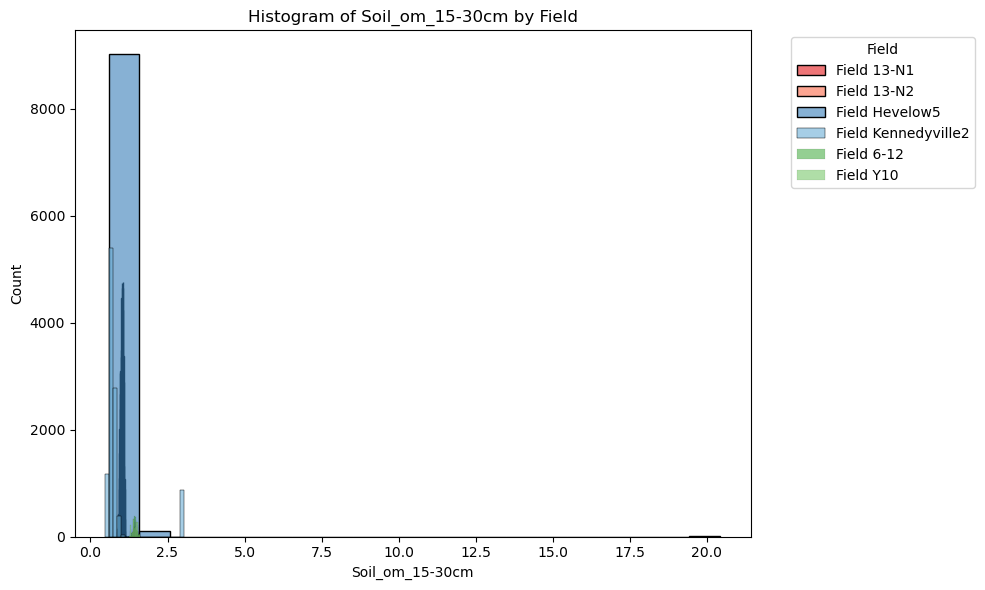

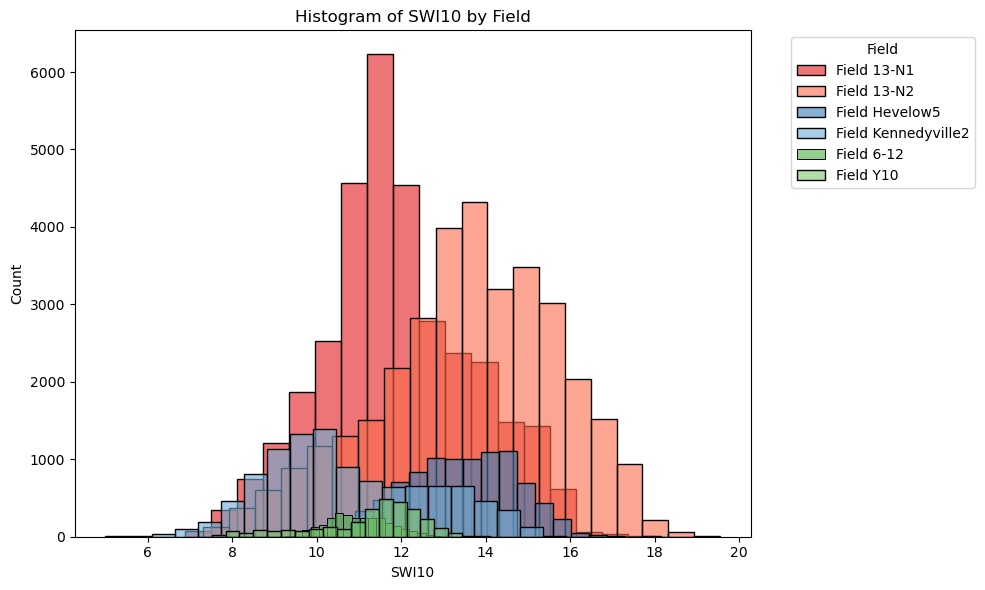

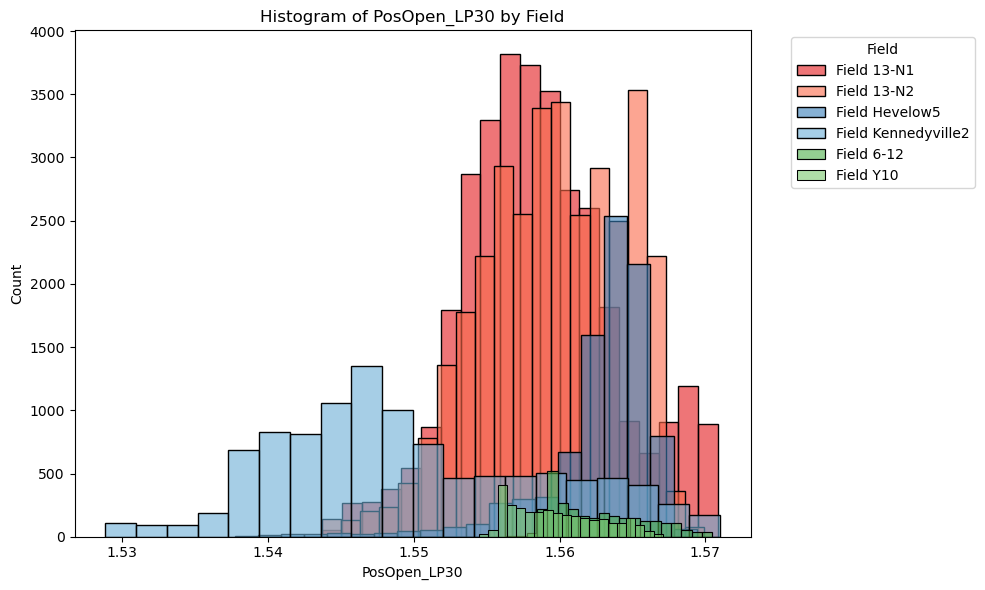

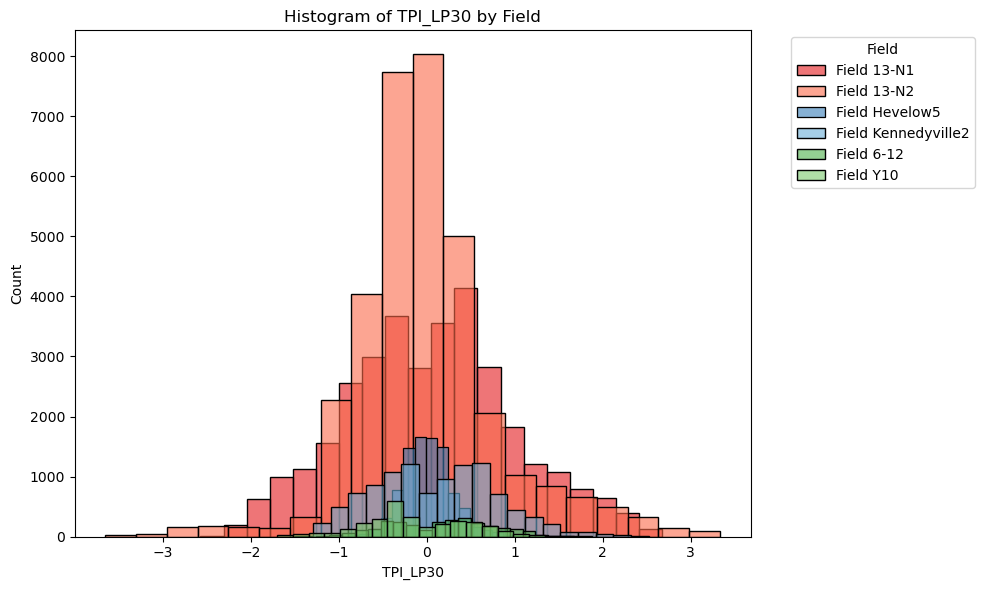

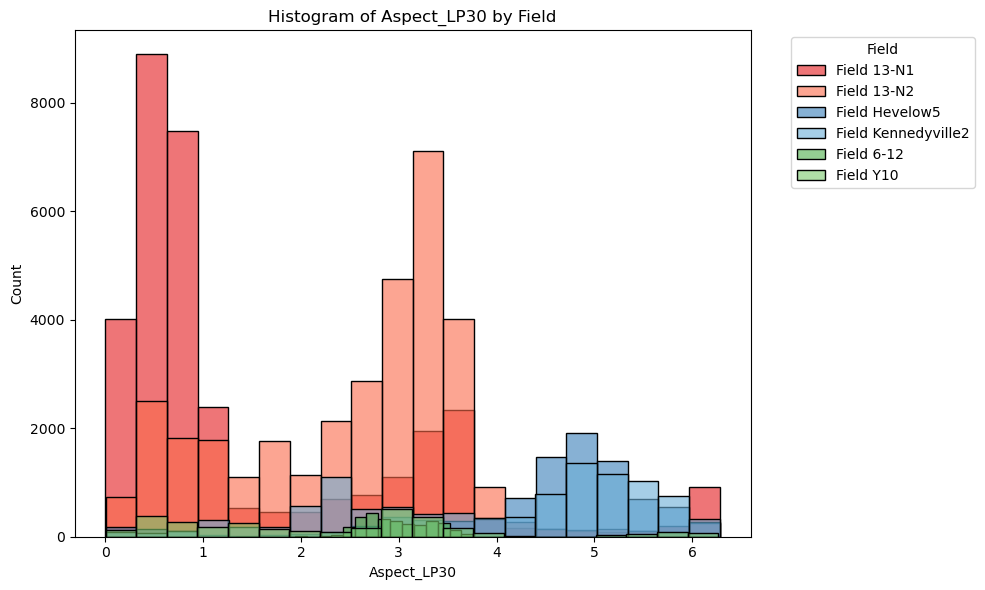

In [11]:
# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set specific color ramp for each state
color_palette = {
    'CO': ['#e41a1c', '#fb6a4a'], 
    'MD': ['#377eb8', '#6baed6'], 
    'TX': ['#4daf4a', '#7bc86c']  
}

# List of variables to plot histograms for
variables_to_plot = [target_variable, 'Mean'] + terrain_attributes

# Create a mapping of fields to colors based on their state
fields_colors = {}
for state in states:
    state_fields = data[data['Site'] == state]['Field'].unique()
    colors = color_palette[state]
    for i, field in enumerate(state_fields):
        fields_colors[field] = colors[i]

# Plot histograms
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    for field in fields:
        subset = data[data['Field'] == field]
        sns.histplot(subset[variable], kde=False, color=fields_colors[field], label=f'Field {field}', alpha=0.6, bins=20)
    
    plt.title(f'Histogram of {variable} by Field')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
